# Notebook to summarise evaluation results and plot graphs

*Note that some filepaths are deprecated so please check before running*

In [12]:
import json
from typing import List
from statistics import stdev

def excecute_eval_no_summary(file_name_list:List[str], category:str) -> None:
    for file_name in file_name_list:
        file_path = f"../data/generations/{file_name}.json"

        with open(file_path, "r") as f:
            dataset = json.load(f)

        bertscore_list = [item[f"{category}_bertScore_average"] for item in dataset if f"{category}_bertScore_average" in item]
        st_list = [item[f"{category}_sentence_transformer_average"] for item in dataset if f"{category}_sentence_transformer_average" in item]
        rouge1 = [item[f"{category}_rouge1"] for item in dataset if f"{category}_rouge1" in item]
        rougeL = [item[f"{category}_rougeL"] for item in dataset if f"{category}_rougeL" in item]
        rougeLsum = [item[f"{category}_rougeLsum"] for item in dataset if f"{category}_rougeLsum" in item]
        
        # Getting sentence transformer average
        if len(st_list) > 1:
            average_st = sum(st_list) / len(st_list)
            print(f"{category}_average_st_{file_name}: {average_st}")
            std_st = stdev(st_list)
            print(f"{category}_std_st_{file_name}: {std_st}")

        # Getting rouge average
        if len(rouge1) > 1:
            average_rouge1 = sum(rouge1) / len(rouge1)
            average_rougeL = sum(rougeL) / len(rougeL)
            average_rougeLsum = sum(rougeLsum) / len(rougeLsum)
            print(f"average_rouge1: {average_rouge1}, average_rougeL: {average_rougeL}, average_rougeLsum: {average_rougeLsum}")
            std_rouge = stdev(rougeLsum)
            print(f"{category}_std_rougeLsum_{file_name}: {std_rouge}")

In [21]:
from rouge_score import rouge_scorer
from QaGeneration import ensure_string
from typing import Dict

def calc_rouge(file_path:str, ref_key:str, cand_key:str, action:str) -> List[Dict]:

    with open(file_path, "r") as f:
        dataset:List[Dict] = json.load(f)

    # Initialize RougeScorer with split_summaries=True
    scorer_rouge = rouge_scorer.RougeScorer(
        ['rouge1', 'rougeL', 'rougeLsum'],
        use_stemmer=True,
        split_summaries=True
    )

    for data in dataset:
        if ref_key not in data or cand_key not in data:
            print(f"error: {data}")
            continue

        scores_rouge = scorer_rouge.score(ensure_string(data[ref_key], joiner=" "), ensure_string(data[cand_key], joiner=" "))
        data[f"{action}_rouge1"] = scores_rouge['rouge1'].fmeasure
        data[f"{action}_rougeL"] = scores_rouge['rougeL'].fmeasure
        data[f"{action}_rougeLsum"] = scores_rouge['rougeLsum'].fmeasure

    return dataset

In [5]:
from typing import List, Dict

def clean_data(dataset:List[Dict], target:str, blank:str="") -> List[Dict]:
    new_dataset = []
    for data in dataset:
        if target in data and data[target] != blank:
            new_dataset.append(data)
    return new_dataset

# Calculating mean and stdev for the evaluation scores (Close-book)

### Eval scores for vicuna 13b v1.3 2023

In [15]:
file_name_list = [
    "nyt/close_book_answers_nyt_vicuna-13b-v1.3",
    "straitstimes/close_book_answers_straitstimes_vicuna-13b-v1.3",
    "rsis/close_book_answers_rsis_vicuna-13b-v1.3"
]
# for file_name in file_name_list:
#     file_path = f"/home/lyijie/self-instruct/data/generations/{file_name}.json"
        
#     dataset = calc_rouge(file_path, "point_form_context", "point_form_close_book_answer", "summarised")

#     with open(file_path, "w") as f:
#         json.dump(dataset, f, indent=2)
        
excecute_eval_no_summary(file_name_list, "answer")
print("")
excecute_eval_no_summary(file_name_list, "summarised")

answer_average_st_nyt/close_book_answers_nyt_vicuna-13b-v1.3: 0.645015592645469
answer_std_st_nyt/close_book_answers_nyt_vicuna-13b-v1.3: 0.09716626678539723
average_rouge1: 0.2757143835759823, average_rougeL: 0.16485469935675556, average_rougeLsum: 0.2554707844229432
answer_std_rougeLsum_nyt/close_book_answers_nyt_vicuna-13b-v1.3: 0.07549654849712592
answer_average_st_straitstimes/close_book_answers_straitstimes_vicuna-13b-v1.3: 0.6756839424244814
answer_std_st_straitstimes/close_book_answers_straitstimes_vicuna-13b-v1.3: 0.1058832549334518
average_rouge1: 0.2721699555227939, average_rougeL: 0.15939636376400362, average_rougeLsum: 0.24823643444801638
answer_std_rougeLsum_straitstimes/close_book_answers_straitstimes_vicuna-13b-v1.3: 0.08081928884979685
answer_average_st_rsis/close_book_answers_rsis_vicuna-13b-v1.3: 0.7189705677033551
answer_std_st_rsis/close_book_answers_rsis_vicuna-13b-v1.3: 0.11332326602547564
average_rouge1: 0.3000137209477002, average_rougeL: 0.1694825374404172, av

### Eval scores for Vicuna-13b-v1.3 2021

In [13]:
file_name_list = [
    "nyt/close_book_answers_nyt_2021_batch_vicuna-13b-v1.3",
    "rsis/close_book_answers_rsis_2021_batch_vicuna-13b-v1.3",
]
excecute_eval_no_summary(file_name_list, "answer")
print("")
excecute_eval_no_summary(file_name_list, "summarised")

answer_average_st_nyt/close_book_answers_nyt_2021_batch_vicuna-13b-v1.3: 0.6300514487125838
answer_std_st_nyt/close_book_answers_nyt_2021_batch_vicuna-13b-v1.3: 0.093024361064458
average_rouge1: 0.21425401911963204, average_rougeL: 0.1115418173758443, average_rougeLsum: 0.20108522905282966
answer_std_rougeLsum_nyt/close_book_answers_nyt_2021_batch_vicuna-13b-v1.3: 0.08180376567211027
answer_average_st_rsis/close_book_answers_rsis_2021_batch_vicuna-13b-v1.3: 0.6938919630597037
answer_std_st_rsis/close_book_answers_rsis_2021_batch_vicuna-13b-v1.3: 0.12417575728993858
average_rouge1: 0.2158703042712484, average_rougeL: 0.10898027487240791, average_rougeLsum: 0.154900993571053
answer_std_rougeLsum_rsis/close_book_answers_rsis_2021_batch_vicuna-13b-v1.3: 0.06894867938101655

summarised_average_st_nyt/close_book_answers_nyt_2021_batch_vicuna-13b-v1.3: 0.5218514466373467
summarised_std_st_nyt/close_book_answers_nyt_2021_batch_vicuna-13b-v1.3: 0.1376924949638921
average_rouge1: 0.2951662447646

### Eval scores for vicuna 7b v1.3 2023

In [23]:
file_name_list = [
    "nyt/close_book_answers_nyt_vicuna-7b-v1.3",
    "rsis/close_book_answers_rsis_vicuna-7b-v1.3",
    "straitstimes/close_book_answers_straitstimes_vicuna-7b-v1.3"
]

excecute_eval_no_summary(file_name_list, "answer")
print("")
excecute_eval_no_summary(file_name_list, "summarised")

answer_average_st_nyt/close_book_answers_nyt_vicuna-7b-v1.3: 0.533236661087558
answer_std_st_nyt/close_book_answers_nyt_vicuna-7b-v1.3: 0.18129347561654777
average_rouge1: 0.2578936406706372, average_rougeL: 0.1615747178702562, average_rougeLsum: 0.23900675079004471
answer_std_rougeLsum_nyt/close_book_answers_nyt_vicuna-7b-v1.3: 0.09200502824690145
answer_average_st_rsis/close_book_answers_rsis_vicuna-7b-v1.3: 0.6089357213828384
answer_std_st_rsis/close_book_answers_rsis_vicuna-7b-v1.3: 0.17132225582521993
average_rouge1: 0.2932808116062043, average_rougeL: 0.17857998725805743, average_rougeLsum: 0.27029039242538744
answer_std_rougeLsum_rsis/close_book_answers_rsis_vicuna-7b-v1.3: 0.10307467385551268
answer_average_st_straitstimes/close_book_answers_straitstimes_vicuna-7b-v1.3: 0.592859409253075
answer_std_st_straitstimes/close_book_answers_straitstimes_vicuna-7b-v1.3: 0.17710831373893976
average_rouge1: 0.2563321543248835, average_rougeL: 0.15619402156346834, average_rougeLsum: 0.2368

#### Eval scores for gpt-3.5-turbo

In [9]:
file_name_list = [
    "nyt/close_book_answers_nyt_gpt-3.5-turbo",
    "rsis/close_book_answers_rsis_gpt-3.5-turbo"
]
excecute_eval_no_summary(file_name_list, "answer")
print("")
excecute_eval_no_summary(file_name_list, "summarised")

answer_average_bs_nyt/close_book_answers_nyt_gpt-3.5-turbo: 0.13486724570393563
answer_average_st_nyt/close_book_answers_nyt_gpt-3.5-turbo: 0.6292660278081893
average_rouge1: 0.2926928931623241, average_rougeL: 0.18147881977936237, average_rougeLsum: 0.2679037669002849
answer_average_bs_rsis/close_book_answers_rsis_gpt-3.5-turbo: 0.2811648192576
answer_average_st_rsis/close_book_answers_rsis_gpt-3.5-turbo: 0.6421023045267378
average_rouge1: 0.3175252676661078, average_rougeL: 0.2017324134832395, average_rougeLsum: 0.3018133642983277
summarised_average_bs_nyt/close_book_answers_nyt_gpt-3.5-turbo: 0.38862225055694577
summarised_average_st_nyt/close_book_answers_nyt_gpt-3.5-turbo: 0.6596406507492066
summarised_average_bs_rsis/close_book_answers_rsis_gpt-3.5-turbo: 0.44455011536677685
summarised_average_st_rsis/close_book_answers_rsis_gpt-3.5-turbo: 0.6595722166697184


# Plotting graphs

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import List
import json

def construct_consine_df(file_name_list:List[str]) -> pd.DataFrame:
    st_df = pd.DataFrame()
    df = pd.DataFrame(columns=["cosine", "context"])
    for file_name in file_name_list:
        file_path = f"../data/generations/{file_name}.json"

        with open(file_path, "r") as f:
            dataset = json.load(f)

        st_list = [item["answer_sentence_transformer_average"] for item in dataset if "answer_sentence_transformer_average" in item]

        if st_df.empty:
            st_df[file_name] = st_list
        else:
            st_df_new = pd.DataFrame(st_list, columns=[file_name])
            st_df = pd.concat([st_df, st_df_new], axis=1)

        # Convert the file columns into consine columns and context columns, where the cosine values correspond to the filename
        new_df = pd.DataFrame({"cosine":st_list, "context":[file_name] * len(st_list)})
        df = pd.concat([df, new_df], ignore_index=True)

    return df

nyt/close_book_answers_nyt_vicuna-7b-v1.3, average: 887.433628318584, median: 931
rsis/close_book_answers_rsis_vicuna-7b-v1.3, average: 950.525, median: 1017.0
straitstimes/close_book_answers_straitstimes_vicuna-7b-v1.3, average: 824.7202797202797, median: 868


<Axes: ylabel='Density'>

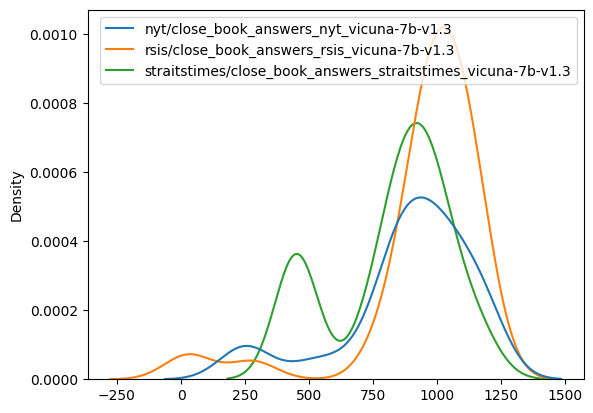

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import List
import json
from QaGeneration import ensure_string
import statistics

def count_words(paragraph):
    # Split the paragraph into words
    words = paragraph.split()
    
    # Return the number of words
    return len(words)

def construct_word_df(file_name_list:List[str]) -> pd.DataFrame:

    df = pd.DataFrame()
    for file_name in file_name_list:
        file_path = f"../data/generations/{file_name}.json"

        with open(file_path, "r") as f:
            dataset = json.load(f)

        word_count = []
        for data in dataset:
            if "context" in data:
                word_count.append(count_words(ensure_string(data["context"], joiner=' ')))
        
        if df.empty:
            df[file_name] = word_count
        else:
            df_new = pd.DataFrame(word_count, columns=[file_name])
            df = pd.concat([df, df_new], axis=1)

        print(f"{file_name}, average: {statistics.mean(word_count)}, median: {statistics.median(word_count)}")

    return df

file_name_list = [
    "nyt/close_book_answers_nyt_vicuna-7b-v1.3",
    "rsis/close_book_answers_rsis_vicuna-7b-v1.3",
    "straitstimes/close_book_answers_straitstimes_vicuna-7b-v1.3"
]

df = construct_word_df(file_name_list)
sns.kdeplot(data=df)

# Calculating perplexity

In [10]:
import glob
import json
import statistics

def calc_perplexity(file_path:str) -> None:
    with open(file_path, "r") as f:
        dataset = json.load(f)

    print(file_path.split("/")[-1])

    perplexity_list = [data["perplexity_overall"] for data in dataset]

    if len(perplexity_list) > 1:
        mean = statistics.mean(perplexity_list)
        std = statistics.stdev(perplexity_list)
    
        print(f"mean: {mean}")
        print(f"std: {std}")

file_directory = "../data/generations/perplexity"

file_path_list = glob.glob(f"{file_directory}/*.json")
for file_path in file_path_list:
    calc_perplexity(file_path)

perplexity_close_book_answers_nyt_2021_batch_vicuna-13b-v1.3.json
mean: 6.913459833930521
std: 1.455786417707267
perplexity_close_book_answers_nyt_vicuna-13b-v1.3.json
mean: 9.005233092741532
std: 1.6189066755063086
perplexity_close_book_answers_rsis_2021_batch_vicuna-13b-v1.3.json
mean: 9.138407174278708
std: 1.5548795140041063
perplexity_close_book_answers_straitstimes_vicuna-13b-v1.3.json
mean: 9.37866118976048
std: 1.8782637351189893
perplexity_close_book_answers_rsis_vicuna-13b-v1.3.json
mean: 10.177601635456085
std: 2.3741149158263823


# Unpaired T-test for cosine similarity

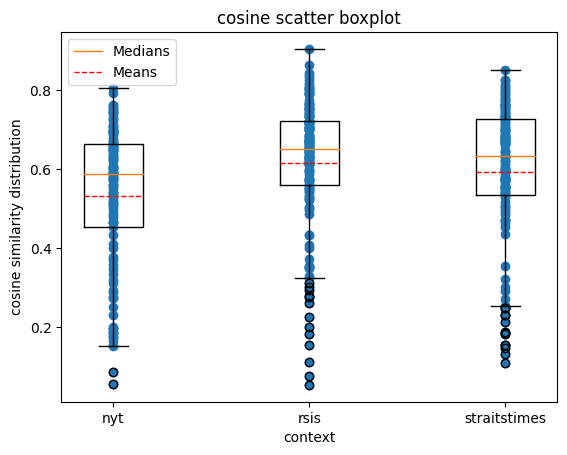

In [17]:
import matplotlib.pyplot as plt
import numpy as np

file_name_list = [
    "nyt/close_book_answers_nyt_vicuna-7b-v1.3",
    "rsis/close_book_answers_rsis_vicuna-7b-v1.3",
    "straitstimes/close_book_answers_straitstimes_vicuna-7b-v1.3"
]

df = construct_consine_df(file_name_list)
nd_context = df['context'].unique()
np.random.seed(20211217)
# x = df['context']
# x_jittered = x + np.random.randn(len(x)) * 0.1 * (max(x) - min(x))

grouped_data = df.groupby('context')['cosine'].apply(list)
positions = range(0, len(nd_context))

positions_list = list(positions)

clean_data_vec = np.vectorize(lambda x : x.split("/")[0])
context_list = list(clean_data_vec(nd_context))

meanprops = {'color': 'r'}
bp = plt.boxplot(grouped_data, positions=positions, showmeans=True, meanline=True, meanprops=meanprops)
plt.scatter(df['context'], df['cosine'])
plt.xticks(positions_list, context_list)
plt.title('cosine scatter boxplot')
plt.xlabel('context')
plt.ylabel('cosine similarity distribution')
plt.legend([bp['medians'][0], bp['means'][0]], ['Medians', 'Means'])